## Experiment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
results_df=pd.read_csv('results.csv')
results_df

,status,train_acc,train_cost,test_acc,test_cost,step
0,amp,0.2625,0.777826,0.37,0.718697,1
1,amp,0.3375,0.727099,0.64,0.671798,2
2,amp,0.5500,0.679930,0.94,0.628515,3
3,amp,0.8875,0.636006,0.95,0.588420,4
4,amp,0.9375,0.594983,0.95,0.551093,5
...,...,...,...,...,...,...
4795,fixed_pe,1.0000,0.005738,1.00,0.019984,96
4796,fixed_pe,1.0000,0.005682,1.00,0.019886,97
4797,fixed_pe,1.0000,0.005628,1.00,0.019791,98
4798,fixed_pe,1.0000,0.005574,1.00,0.019696,99


In [10]:
df_agg = results_df.groupby(["status", "step"]).agg(["mean", "std"]).reset_index()
df_agg

status step train_acc           train_cost           test_acc            \
                     mean       std       mean       std     mean       std   
0      amp    1  0.465625  0.142169   0.733118  0.082977  0.56250  0.251439   
1      amp    2  0.560937  0.236647   0.682577  0.067103  0.69875  0.195407   
2      amp    3  0.685938  0.212493   0.637127  0.055181  0.84250  0.140586   
3      amp    4  0.862500  0.120268   0.595901  0.047076  0.86625  0.132551   
4      amp    5  0.889062  0.112488   0.558252  0.041839  0.87250  0.125442   
..     ...  ...       ...       ...        ...       ...      ...       ...   
595    old   96  1.000000  0.000000   0.048791  0.006023  0.99875  0.003536   
596    old   97  1.000000  0.000000   0.048245  0.006045  0.99875  0.003536   
597    old   98  1.000000  0.000000   0.047611  0.005997  0.99875  0.003536   
598    old   99  1.000000  0.000000   0.047248  0.005896  0.99875  0.003536   
599    old  100  1.000000  0.000000   0.046703  0.005913  0.99875  0.003536   

    test_cost            
         mean       std  
0    0.678694  0.053697  
1    0.637451  0.047464  
2    0.599962  0.043684  
3    0.565595  0.041624  
4    0.533770  0.040715  
..        ...       ...  
595  0.057864  0.011449  
596  0.057024  0.011590  
597  0.056591  0.011402  
598  0.056114  0.011359  
599  0.055470  0.011259  

[600 rows x 10 columns]

['old', 'new', 'norm', 'amp', 'learned_pe', 'fixed_pe']
[0.008767768274992725, 0.013041409431025379, 0.00617788740783, 0.007181514636613423, 0.00613738351967185, 0.004932444426231088]


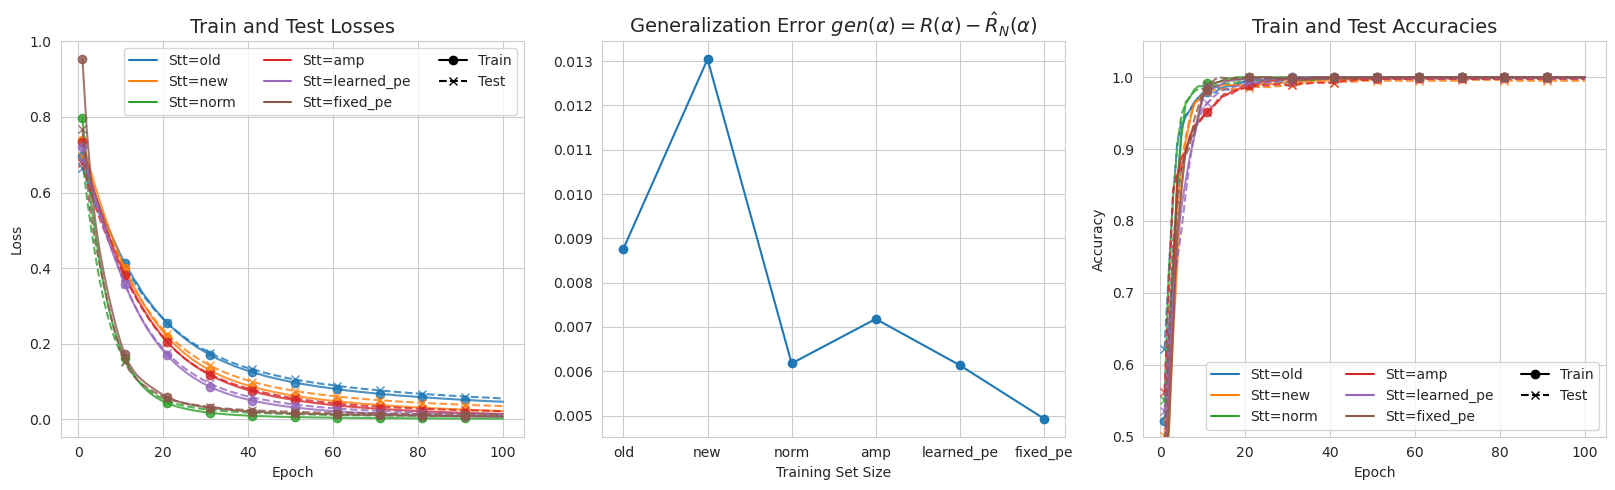

In [13]:
# Plotting
status=['old','new','norm','amp','learned_pe','fixed_pe']
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, stt in enumerate(status):
    df = df_agg[df_agg.status == stt]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={stt}$", None, fr"$N={stt}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print(status)
print(generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(status, generalization_errors, "o-", label=r"$gen(\alpha)$")
# axes[1].set_xscale('log')
axes[1].set_xticks(status)
axes[1].set_xticklabels(status)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
# axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'Stt={n}', color=colors[i]) for i, n in enumerate(status)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()